In [1]:
import CodaRegressmb as CodaRegress
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import CodaPCA

In [2]:
data = pd.read_csv("Aitchinson/Data 18. Compositions and total pebble counts of 92 glacial tills.csv")




# headers = data[1]
# features = data[0][:,co_feature_indices]
# targets = data[0][:,target_index]
    
# #normalise the compositional features. TODO anything extra to deal with non compositional features?


features = data[data.columns[1:-1]]
targets = data[data.columns[-1]]

features = np.array([feat/sum(feat) for feat in features.values])


features = torch.FloatTensor(features)
targets = torch.FloatTensor(targets)

targets

tensor([ 282.,  368.,  607.,  532.,  360.,  470.,  102.,  544.,  387.,  294.,
         503.,  697.,  393.,  665.,  347.,  791.,  225.,  175.,  333.,  269.,
         118.,  154.,  276.,  480.,  373.,  369.,  126.,  460.,  441.,  502.,
         126.,  376.,  118.,  303.,  250.,  582.,   69.,  226.,  359.,  453.,
         427.,  334.,  364.,  869.,  441.,  615.,  532.,  417.,  360.,  580.,
         147.,  500.,  943.,  305., 1151.,  457.,  637.,  284.,  386.,  221.,
         208.,  573.,  565.,  170.,  261., 1097.,  408.,   24.,  890.,  168.,
          22.,  601.,  364.,  342.,  867.,  691.,  462.,  318.,  461.,  777.,
         397.,  347.,  744.,  576.,  321.,  382.,  645.,  459.,  681.,  245.,
         575.,  698.])

In [3]:
data = pd.read_csv("Aitchinson/Data 5. Sand, silt, clay compositions of 39 sediment samples at different water depths in an Arctic lake.csv")

features = data[data.columns[1:-1]]
targets = data[data.columns[-1]]

features = np.array([feat/sum(feat) for feat in features.values])


features = torch.FloatTensor(features)
targets = torch.FloatTensor(targets)

features

tensor([[0.7750, 0.1950, 0.0300],
        [0.7190, 0.2490, 0.0320],
        [0.5070, 0.3610, 0.1320],
        [0.5236, 0.4102, 0.0662],
        [0.7000, 0.2650, 0.0350],
        [0.6650, 0.3220, 0.0130],
        [0.4310, 0.5530, 0.0160],
        [0.5340, 0.3680, 0.0980],
        [0.1550, 0.5440, 0.3010],
        [0.3170, 0.4150, 0.2680],
        [0.6570, 0.2780, 0.0650],
        [0.7040, 0.2900, 0.0060],
        [0.1740, 0.5360, 0.2900],
        [0.1060, 0.6980, 0.1960],
        [0.3820, 0.4310, 0.1870],
        [0.1080, 0.5270, 0.3650],
        [0.1840, 0.5070, 0.3090],
        [0.0460, 0.4740, 0.4800],
        [0.1560, 0.5040, 0.3400],
        [0.3190, 0.4510, 0.2300],
        [0.0950, 0.5350, 0.3700],
        [0.1710, 0.4800, 0.3490],
        [0.1050, 0.5540, 0.3410],
        [0.0478, 0.5443, 0.4080],
        [0.0260, 0.4520, 0.5220],
        [0.1140, 0.5270, 0.3590],
        [0.0670, 0.4690, 0.4640],
        [0.0690, 0.4970, 0.4340],
        [0.0400, 0.4490, 0.5110],
        [0.074

CoDA_Regress(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (encoder): Sequential(
    (layer0): Linear(in_features=6, out_features=100, bias=True)
    (final_layer): Linear(in_features=100, out_features=2, bias=True)
    (final_ac): ELU(alpha=1.0)
  )
  (decoder): Sequential(
    (layer0): Linear(in_features=2, out_features=3, bias=True)
    (final_layer): Linear(in_features=3, out_features=3, bias=True)
    (final_ac): ELU(alpha=1.0)
  )
)


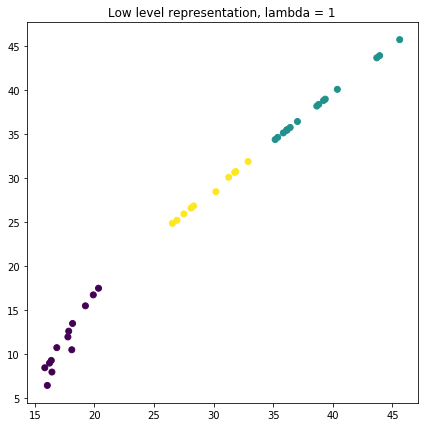

In [83]:
#training code stub, read in data as X and targets as y
#TODO substitute this into model class, and set up API similar to original CoDA-PCA paper
features = torch.FloatTensor(features)

X = features
y = targets.reshape(-1,1)
model = CodaRegress.CoDA_Regress(X.shape[1], 2, [100,], [3,])

print (model)

model.fit(torch.FloatTensor(X),  torch.FloatTensor(y), 1, lr=1e-3, train_size= int(len(X)*(3/4)), epochs=1000)

test = model.transform(X).detach().numpy()









fig = plt.figure(figsize=(7,7))

plt.scatter(test[:,0], test[:,1], c=labels)

plt.title("Low level representation, lambda = 1")

fig.savefig("lambda_low.pdf", bbox_inches='tight')

plt.show()








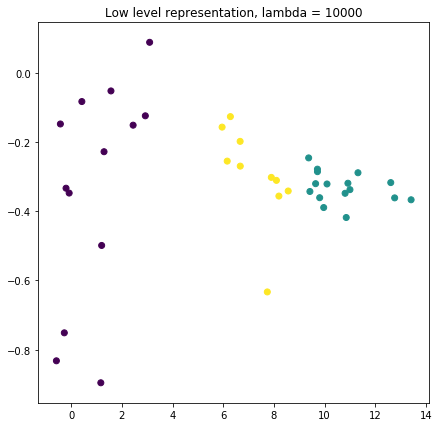

In [75]:
from sklearn.cluster import KMeans

clusters = 3

clust = KMeans(clusters)

clust.fit(test)

labels = clust.labels_

fig = plt.figure(figsize=(7,7))

plt.scatter(test[:,0], test[:,1], c=labels)

plt.title("Low level representation, lambda = 10000")

fig.savefig("lambda_high2.pdf", bbox_inches='tight')

    

[epoch     0] L=  2.4318


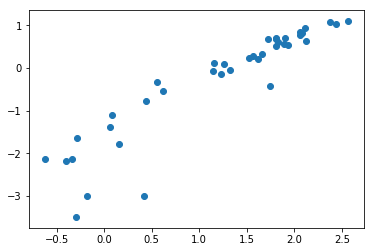

In [79]:
data = pd.read_csv("Aitchinson/Data 5. Sand, silt, clay compositions of 39 sediment samples at different water depths in an Arctic lake.csv")

features = data[data.columns[1:-1]]
targets = data[data.columns[-1]]

features = np.array([feat/sum(feat) for feat in features.values])


#features = torch.FloatTensor(features)
targets = torch.FloatTensor(targets)

pca = CodaPCA.CodaPCA(2,lrate=1e-2,nn_shape=[50,50], alg=CodaPCA.Alg.CODAPCA)

test2 = pca.fit_transform(features)

plt.scatter(test2[:,0], test2[:,1])




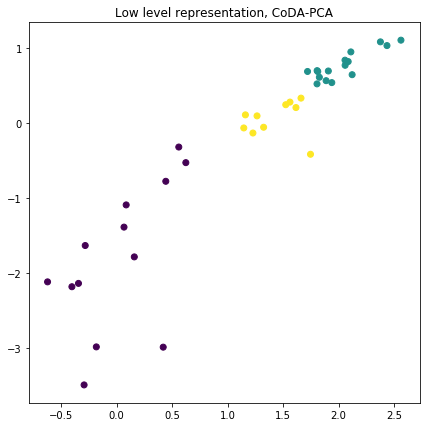

In [80]:


fig = plt.figure(figsize=(7,7))

plt.scatter(test2[:,0], test2[:,1], c=labels)

plt.title("Low level representation, CoDA-PCA")

fig.savefig("coda_rep.pdf", bbox_inches='tight')


In [8]:
kf = KFold(4)
splits = [i for i in kf.split(features)]
splits

NameError: name 'KFold' is not defined

In [ ]:
#training code stub, read in data as X and targets as y
#TODO substitute this into model class, and set up API similar to original CoDA-PCA paper


X = features
y = targets.reshape(-1,1)
#define the combined loss with hyperparameter lambda
scores = []
for ind in splits: 
    model = CoDA_Regress(X.shape[1], 2, [101,], [3,])
    
    #model = Ridge(1)
    
    model.fit(torch.FloatTensor(X[ind[0]]),  torch.FloatTensor(y[ind[0]]), 0, lr=1e-2)

    y_pred = model.predict(torch.FloatTensor(X[ind[1]]))

#     print(y_pred)
#     print(y[ind[1]].detach().numpy())
    
    scores.append(sklearn.metrics.mean_squared_error(y[ind[1]].detach().numpy(),y_pred.detach().numpy()))
    
scores

